In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib.lines import Line2D

In [2]:
# Annahme: 'accidents' ist dein DataFrame mit den bearbeiteten Daten
accidents = pd.read_csv('data/edited_file.csv', index_col='ID')
numeric_features = ['Temperature(F)', 'Wind_Speed(mph)', 'Humidity(%)', 'Distance(mi)', 'Start_Lng', 'Start_Lat']

In [3]:
# Entferne Zeilen mit NaN-Werten
accidents_cleaned = accidents.dropna(subset=numeric_features)

# Extrahiere die ausgewählten numerischen Features
features_for_clustering = accidents_cleaned[numeric_features]

# Standardisierung der Daten (wichtig für k-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

# Wähle die Anzahl der Cluster (k)
num_clusters = 4  # Beispiel: 3 Cluster

# Führe k-Means-Clusteranalyse durch
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
accidents_cleaned['Cluster'] = kmeans.fit_predict(scaled_data)

# Ausgabe der Clusterzugehörigkeit
cluster_counts = accidents_cleaned['Cluster'].value_counts()
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} Daten')

C:\Users\forte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\forte\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\forte\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Cluster 2: 2130529 Daten
Cluster 1: 1905391 Daten
Cluster 0: 1689905 Daten
Cluster 3: 1399244 Daten


C:\Users\forte\AppData\Local\Temp\ipykernel_25336\3700263594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_cleaned['Cluster'] = kmeans.fit_predict(scaled_data)


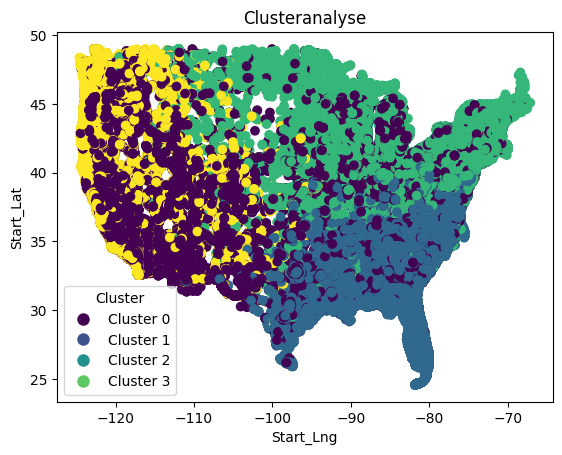

In [4]:
# Erstelle eine Legende mit den Farbzuordnungen
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/num_clusters), markersize=10, label=f'Cluster {i}')
                   for i in range(num_clusters)]

# Scatterplot mit Farbzuordnung
plt.scatter(accidents_cleaned['Start_Lng'], accidents_cleaned['Start_Lat'], c=accidents_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Start_Lng')
plt.ylabel('Start_Lat')
plt.title('Clusteranalyse')

# Füge die Legende hinzu
plt.legend(handles=legend_elements, title='Cluster')

# Zeige die Visualisierung an
plt.show()